In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [72]:
# load dataset
df = pd.read_csv('./data/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [74]:
# check data

#check is value nullable
print("Check is value nullable :{0}".format("Value is nullable" if df.isnull().values.any() else "Value is not nullable"))
#check correlative data
df.corr()


Check is value nullable :Value is not nullable


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


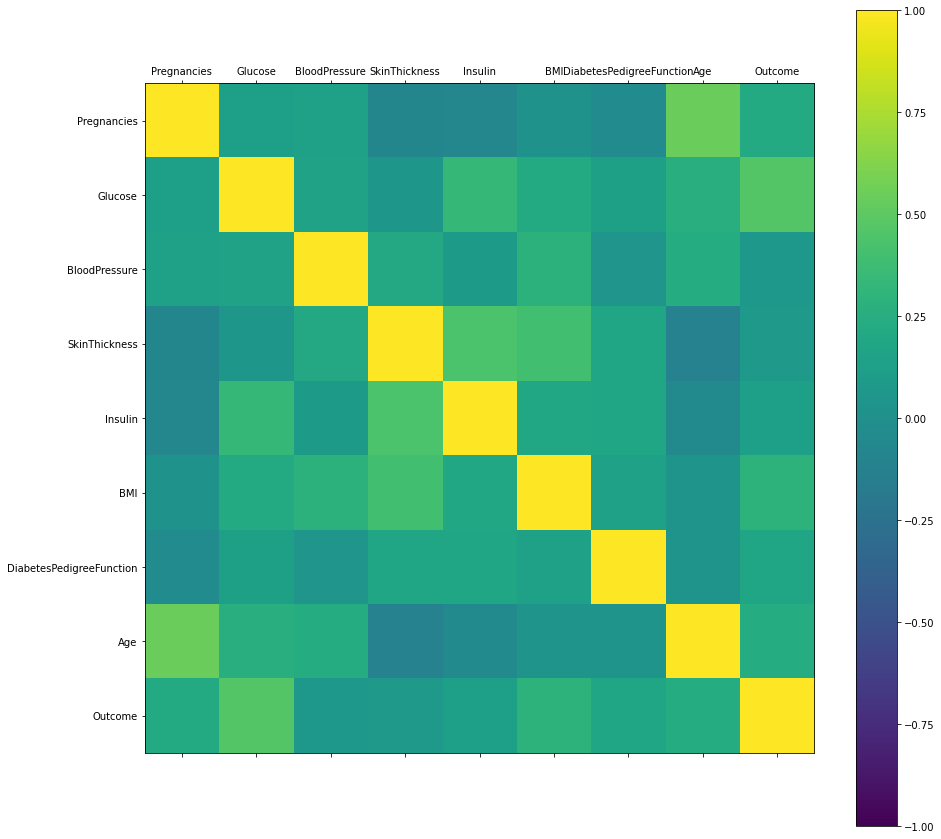

In [75]:
#check correlative graph
def corrPlot(df, size=13):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    col = ax.matshow(corr,vmin=-1,vmax=1)
    fig.colorbar(col)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
corrPlot(df,size=15)

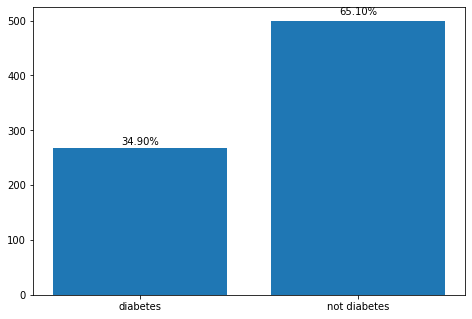

In [76]:
#check true/false radio of data
def barPlot(labels,values):
    fig = plt.figure()
    ax  = fig.add_axes([0,0,1,1])
    ax.bar(labels,values)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height/len(df.index):.2%}', (x + width/2, y + height*1.02), ha='center')
    plt.show()
num_true = len(df.loc[df['Outcome'] == 1])
num_false = len(df.loc[df['Outcome'] == 0])
barPlot(['diabetes','not diabetes'],[num_true,num_false])

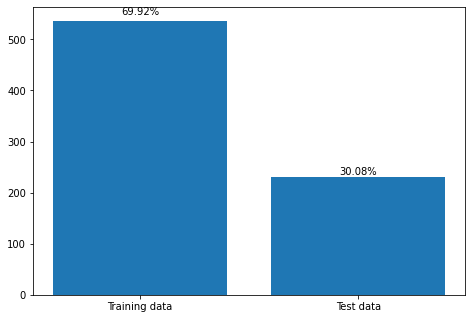

In [77]:
#split data
from sklearn.model_selection import train_test_split

features = df[[x for x in df.columns if x != 'Outcome']].values
outcome = df[['Outcome']].values
x_train,x_test,y_train,y_test = train_test_split(features,outcome,test_size=0.3,random_state=52)
barPlot(['Training data','Test data'],[len(x_train),len(x_test)])

In [78]:
#check missing data
[print("rows missing {0}: {1}".format(col,len(df.loc[df[col] == 0]))) for col in df.columns if col != 'Outcome'];print("")

rows missing Pregnancies: 111
rows missing Glucose: 5
rows missing BloodPressure: 35
rows missing SkinThickness: 227
rows missing Insulin: 374
rows missing BMI: 11
rows missing DiabetesPedigreeFunction: 0
rows missing Age: 0



In [79]:
#impute missing data
from sklearn.impute import SimpleImputer

fill_0 = SimpleImputer(missing_values=0,strategy="mean")
x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

Accurarcy: 74.67%
Classification report : 
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       345
           1       0.66      0.59      0.63       192

    accuracy                           0.75       537
   macro avg       0.72      0.71      0.72       537
weighted avg       0.74      0.75      0.74       537



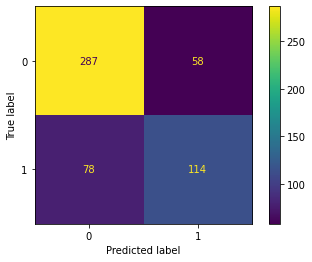

In [80]:
# Initial algorithm (Naive Bayes)
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

nb_model = GaussianNB()
nb_model.fit(x_train,y_train.ravel())

#nb_model performance
#predict on training data
def plotConfusionMatrix(model,features,outcome):
    metrics.plot_confusion_matrix(model,features,outcome)

nb_train = nb_model.predict(x_train)
print(f'Accurarcy: {metrics.accuracy_score(y_train,nb_train)/1:.2%}')
print("Classification report : \n{0}".format(metrics.classification_report(y_train,nb_train)))
plotConfusionMatrix(nb_model,x_train,y_train)

Accurarcy: 75.32%
Classification report : 
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       155
           1       0.62      0.64      0.63        76

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.76      0.75      0.75       231



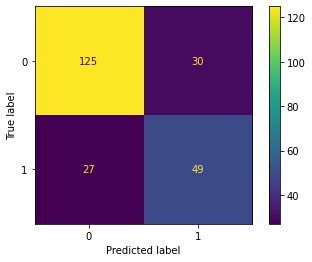

In [81]:
#predict on training data
nb_test = nb_model.predict(x_test)
print(f'Accurarcy: {metrics.accuracy_score(y_test,nb_test)/1:.2%}')
print("Classification report : \n{0}".format(metrics.classification_report(y_test,nb_test)))
plotConfusionMatrix(nb_model,x_test,y_test)

Accurarcy: 100.00%
Classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       345
           1       1.00      1.00      1.00       192

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



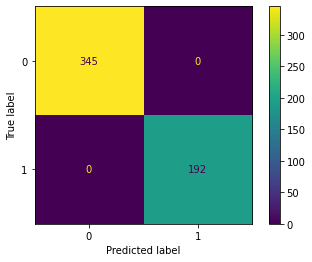

In [82]:
# improve performance
# Random Forest algorithm
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=52)
rf_model.fit(x_train,y_train.ravel())

#rf_model performance
#predict training model
rf_train = rf_model.predict(x_train)
print(f'Accurarcy: {metrics.accuracy_score(y_train,rf_train)/1:.2%}')
print("Classification report : \n{0}".format(metrics.classification_report(y_train,rf_train)))
plotConfusionMatrix(rf_model,x_train,y_train)

Accurarcy: 75.76%
Classification report : 
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       155
           1       0.64      0.62      0.63        76

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.76      0.76      0.76       231



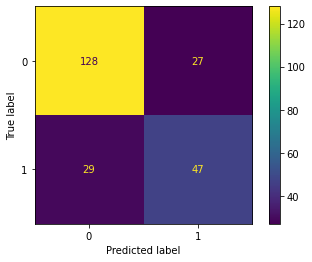

In [83]:
#predict train data
rf_test = rf_model.predict(x_test)
print(f'Accurarcy: {metrics.accuracy_score(y_test,rf_test)/1:.2%}')
print("Classification report : \n{0}".format(metrics.classification_report(y_test,rf_test)))
plotConfusionMatrix(rf_model,x_test,y_test)

Accurarcy: 75.23%
Confusion matrix:
[[266  79]
 [ 54 138]]
Classification report : 
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       345
           1       0.64      0.72      0.67       192

    accuracy                           0.75       537
   macro avg       0.73      0.74      0.74       537
weighted avg       0.76      0.75      0.76       537



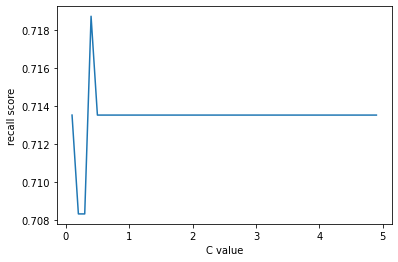

In [91]:
#random forest overfit and unbalanced class between diabetes and not diabetes
#try logistic regression with adjusting regularization to improving recall score
from sklearn.linear_model import LogisticRegression

def plotRegularization(C_values,recall_scores):
    plt.plot(C_values,recall_scores,'-')
    plt.xlabel("C value")
    plt.ylabel("recall score")

#predict train data
C_values,recall_scores = [],[]
high_C,high_recall = 0,0
high_lr_train = None
for x in np.arange(0.1,5,0.1):
    lr_model = LogisticRegression(C=x,random_state=52,class_weight="balanced",max_iter=len(x_train))
    lr_model.fit(x_train,y_train.ravel())
    lr_train = lr_model.predict(x_train)
    recall_score = metrics.recall_score(y_train,lr_train)
    if recall_score > high_recall:
        high_recall = recall_score
        high_C = x
        high_lr_train = lr_train
    C_values.append(x)
    recall_scores.append(recall_score)
print(f'Accurarcy: {metrics.accuracy_score(y_train,high_lr_train)/1:.2%}')
print("Confusion matrix:\n{0}".format(metrics.confusion_matrix(y_train,high_lr_train)))
print("Classification report : \n{0}".format(metrics.classification_report(y_train,high_lr_train)))
plotRegularization(C_values,recall_scores)

Accurarcy: 77.06%
Confusion matrix:
[[120  35]
 [ 18  58]]
Classification report : 
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       155
           1       0.62      0.76      0.69        76

    accuracy                           0.77       231
   macro avg       0.75      0.77      0.75       231
weighted avg       0.79      0.77      0.78       231



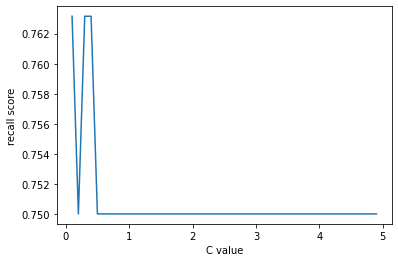

In [93]:
# predict test cata

C_values,recall_scores = [],[]
high_C,high_recall = 0,0
high_lr_model,high_lr_test = None,None
for x in np.arange(0.1,5,0.1):
    lr_model = LogisticRegression(C=x,random_state=52,class_weight="balanced",max_iter=len(x_train))
    lr_model.fit(x_train,y_train.ravel())
    lr_test = lr_model.predict(x_test)
    recall_score = metrics.recall_score(y_test,lr_test)
    if recall_score > high_recall:
        high_recall = recall_score
        high_C = x
        high_lr_model = lr_model
        high_lr_test = lr_test
    C_values.append(x)
    recall_scores.append(recall_score)
print(f'Accurarcy: {metrics.accuracy_score(y_test,high_lr_test)/1:.2%}')
print("Confusion matrix:\n{0}".format(metrics.confusion_matrix(y_test,high_lr_test)))
print("Classification report : \n{0}".format(metrics.classification_report(y_test,high_lr_test)))
plotRegularization(C_values,recall_scores)

Accurarcy: 75.32%
Confusion matrix:
[[116  39]
 [ 18  58]]
Classification report : 
              precision    recall  f1-score   support

           0       0.87      0.75      0.80       155
           1       0.60      0.76      0.67        76

    accuracy                           0.75       231
   macro avg       0.73      0.76      0.74       231
weighted avg       0.78      0.75      0.76       231



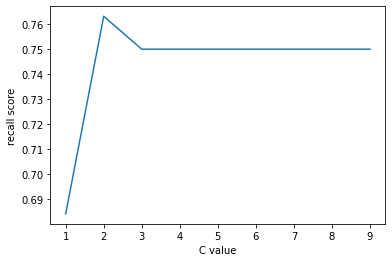

In [95]:
#apply k-cross validation
from sklearn.linear_model import LogisticRegressionCV

cross_split = 10
C_values,recall_scores = [],[]
high_C,high_recall = 0,0
high_lr_model,high_lr_test = None,None
for x in np.arange(1,cross_split,1):
    lr_model = LogisticRegressionCV(Cs=x,random_state=52,class_weight="balanced",max_iter=len(x_train),n_jobs=-1,cv=cross_split)
    lr_model.fit(x_train,y_train.ravel())
    lr_test = lr_model.predict(x_test)
    recall_score = metrics.recall_score(y_test,lr_test)
    if recall_score > high_recall:
        high_recall = recall_score
        high_C = x
        high_lr_model = lr_model
        high_lr_test = lr_test
    C_values.append(x)
    recall_scores.append(recall_score)
print(f'Accurarcy: {metrics.accuracy_score(y_test,high_lr_test)/1:.2%}')
print("Confusion matrix:\n{0}".format(metrics.confusion_matrix(y_test,high_lr_test)))
print("Classification report : \n{0}".format(metrics.classification_report(y_test,high_lr_test)))
plotRegularization(C_values,recall_scores)

In [96]:
#save model
import joblib
joblib.dump(high_lr_model,"./model/diabetes_model.joblib")

['./model/diabetes_model.joblib']